<a href="https://colab.research.google.com/github/AranHajiaghapour/Final_MultyMediaSystem_Project/blob/main/Final_MultyMediaSystem_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

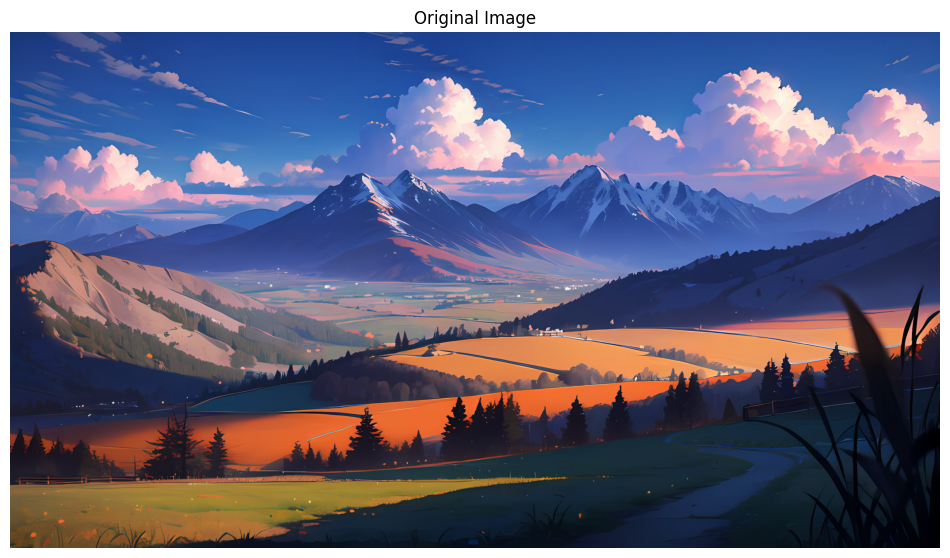

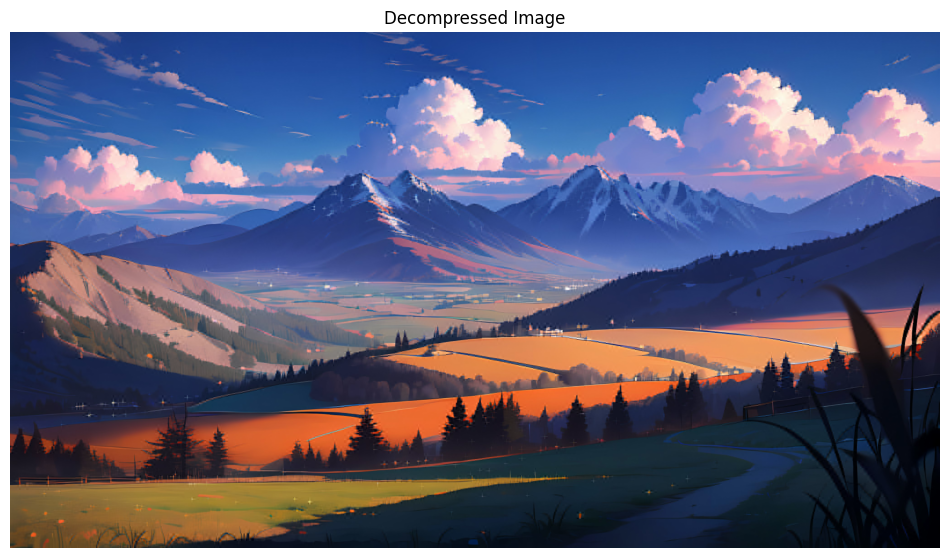

PSNR: 32.450784358989196


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_dct_and_threshold(block, threshold):
    """
    Apply DCT on a block and then apply thresholding to compress.
    """
    dct_block = cv2.dct(block)
    dct_block[threshold:, threshold:] = 0
    return dct_block

def process_blocks(channel, block_size, threshold):
    """
    Process all blocks in the given channel with DCT compression and then inverse DCT.
    """
    processed = np.empty_like(channel, dtype=np.float32)
    for y in range(0, channel.shape[0], block_size):
        for x in range(0, channel.shape[1], block_size):
            block = channel[y:y+block_size, x:x+block_size].astype(np.float32)
            dct_block = apply_dct_and_threshold(block, threshold)
            processed[y:y+block_size, x:x+block_size] = cv2.idct(dct_block)
    return processed

def compress_image(image_path, block_size=32):
    """
    Compress and decompress the image, returning the PSNR and displaying both images.
    """
    img = cv2.imread(image_path)
    yuv_img = cv2.cvtColor(img, cv2.COLOR_BGR2YUV)
    y, u, v = cv2.split(yuv_img)

    file_size = 2
    compressed_y = process_blocks(y, block_size, file_size)
    compressed_img = cv2.merge([compressed_y.clip(0, 255).astype(np.uint8), u, v])
    decompressed_img = cv2.cvtColor(compressed_img, cv2.COLOR_YUV2BGR)

    psnr_value = cv2.PSNR(img, decompressed_img)
    display_images(img, decompressed_img)

    return psnr_value

def display_images(original_img, decompressed_img):
    """
    Display the original and processed images for comparison.
    """
    titles = ['Original Image', 'Decompressed Image']
    images = [cv2.cvtColor(original_img, cv2.COLOR_BGR2RGB), cv2.cvtColor(decompressed_img, cv2.COLOR_BGR2RGB)]


    for i in range(2):
        #plt.subplot(2, 2, i + 1)
        plt.figure(figsize=(12, 8))
        plt.imshow(images[i])
        plt.title(titles[i])
        plt.axis('off')
        plt.show()

# Example usage (ensure you replace "aran.png" with the correct path to your image)
psnr = compress_image("aran.png")
print(f"PSNR: {psnr}")
